# Group 9

Names: Cedric Attias, Vivek Dhull, Van Grando, Xinyi Li, Temisa’n Odeka, Adrian Singh

# Data Sourcing

* The dataset is an Open Data set sourced from Kaggle.com. It provides detailed medical diagnostic measurements that were collected to from 768 female patients in order to predict the onset of diabetes based on several health factors.
* Each record is characterized by 8 health-related attributes and an Outcome variable indicating whether the patient has diabetes (1) or not (0).
* The data is open sourced and can be freely downloaded from kaggle.com. The dataset is originally adapted from the United States' National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and is widely used in machine learning research on healthcare and medical diagnostics.  The data can be downloaded without signing-in/up from kaggle.com, although there is an option for that.

### Data is read into IDE of choice
* In this instance, Visual Studio Code was used.
* Pandas is imported inorder to manipulate, explore and clean the data.

In [1]:
#File path will only work for my computer as the file was downloaded locally
#Download locally and modify file path
import pandas as pd
import numpy as np

diabetes_df=pd.read_csv(r'diabetes_dataset.csv')
diabetes_df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

### A quick exploration to learn more about the data

In [2]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* It shows that there are no NULL values in the dataset.

In [3]:
# Here we check to get more information about the data set.
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
# Several columns show that the minimum value is 0.
# To get a better sense of the number of zeros within each column we check each column, other than Pregnancy and Outcome

columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
zero_counts = (diabetes_df[columns_to_check] == 0).sum()

print("Number of 0 values in each column:")
print(zero_counts)

Number of 0 values in each column:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


# Data Cleaning - Replacing Zero Values

In [5]:
# Determining the mode of replacing zero values for each column.
# For the Insulin column the mean insulin value for the non-zero insulin is used to replace the zeros
# For the BloodPressure and SkinThickness, the mean non-zero value of each age is used to replace the zeros - Blood Pressure and
# For Glucose, the mean value for patients with diabetes is used to assign a value, same for patients without diabetes

mean_replacement = ['Insulin']
mean_replacement_by_age = ['BloodPressure', 'SkinThickness']
mean_replacement_by_outcome = ['Glucose']
median_replacement = ['BMI']

In [6]:
for a in mean_replacement:
    diabetes_df[a] = diabetes_df[a].transform(
        lambda x: x.replace(0, x[x != 0].mean())
    )

for b in mean_replacement_by_age:
    diabetes_df[b] = diabetes_df.groupby('Age')[b].transform(
        lambda x: x.replace(0, x[x != 0].mean())
    )

for c in mean_replacement_by_outcome:
    diabetes_df[c] = diabetes_df.groupby('Outcome')[c].transform(
        lambda x: x.replace(0, x[x != 0].mean())
    )

for d in median_replacement:
    diabetes_df[d] = diabetes_df[d].transform(
        lambda x: x.replace(0, x[x != 0].median())
    )

#Checking again to see if the zero values have been replaced

columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
zero_counts = (diabetes_df[columns_to_check] == 0).sum()

print(zero_counts)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [7]:
# Checking the description of the dataset to see the changes to the min values of the columns
diabetes_df.describe()



Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     767.000000     756.000000  768.000000   
mean      3.845052  121.697358      72.367814      29.360271  155.548223   
std       3.369578   30.462008      12.144631       9.198129   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.901961  121.500000   
50%       3.000000  117.000000      72.000000      29.535714  155.548223   
75%       6.000000  141.000000      80.000000      34.071429  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# Another option to replace missing values with NAN

# df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# missing_values = df.isnull().sum()

# Data Cleaning - Replacing NaN Values

In [9]:
# Check for NaN values in the dataset
nan_summary = diabetes_df.isna().sum()

# Display columns with NaN values
print("Summary of NaN Values in Each Column:")
print(nan_summary[nan_summary > 0])

Summary of NaN Values in Each Column:
BloodPressure     1
SkinThickness    12
dtype: int64


#### 1. For BloodPressure (1 missing value):
* Since there's only 1 missing value, you can replace it with the median of the column to maintain consistency.

In [10]:
# Replace NaN in BloodPressure and SkinThickness with their respective median values
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].median())

### 2. For SkinThickness (12 missing values):
* Given the higher number of missing values compared to BloodPressure, but generally not a high percentage of the dataset, replace with median as well.

In [11]:
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median())

### 3. Check if NaN persists

In [12]:
# Check for NaN values in the dataset
nan_summary = diabetes_df.isna().sum()

# Display columns with NaN values
print("Summary of NaN Values in Each Column:")
print(nan_summary[nan_summary > 0])

Summary of NaN Values in Each Column:
Series([], dtype: int64)


# Challenges

* There were no missing values, rather zero seemed to have been inputed in place of missing values
* Lack of clarity as to which values to replace with mean or median, relied on some little research and cognitive knowledge


# Analyses Part 1 - Data Exploration, Correleation Analysis and Feature Importance

### Exploratory Data Analysis

#### Compute measures like mean, median, standard deviation, and range for all columns.
- Identify outliers using statistical methods or visualizations.
- Visualize the data distribution with boxplots, scatterplots and histograms.
- Use visualizations to observe differences between groups (e.g., glucose levels in diabetic vs. non-diabetic patients).
- Summarize the data for both diabetes-positive and diabetes-negative groups.

### 1. Compute Descriptive Statistics
* Compute measures like mean, median, standard deviation, and range for all columns.

In [13]:
# Descriptive statistics
desc_stats = diabetes_df.describe().T
desc_stats['mean'] = diabetes_df.mean()
desc_stats['median'] = diabetes_df.median()
desc_stats['Standard Deviation'] = diabetes_df.std()
desc_stats['range'] = diabetes_df.max() - diabetes_df.min()

print("Descriptive Statistics:")
print(desc_stats)

Descriptive Statistics:
                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.697358  30.462008  44.000   99.75000   
BloodPressure             768.0   72.367335  12.136719  24.000   64.00000   
SkinThickness             768.0   29.363012   9.125917   7.000   24.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max      median  \
Pregnancies                 3.000000    6.000000   17.00    3.000000   
Glucose                   117.000000  141.000000  199.00  117

### Identify Outliers
* Outliers can be identified using statistical methods such as the Interquartile Range (IQR) and visualized with boxplots.

In [14]:
# Identify outliers using IQR (Interquartile Range)
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

print("Outliers detected in each column:")
print(outliers)

Outliers detected in each column:
Pregnancies                   4
Glucose                       0
BloodPressure                14
SkinThickness                18
Insulin                     164
BMI                           8
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64


### 3. Visualize Data
* Use boxplots, scatterplots, and histograms to observe distributions and relationships.

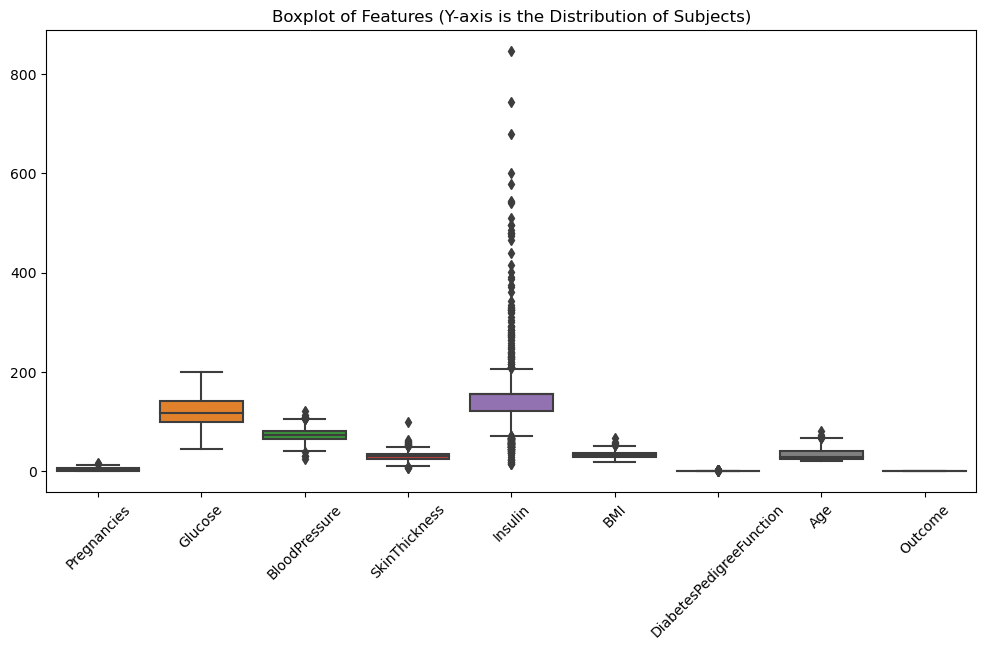

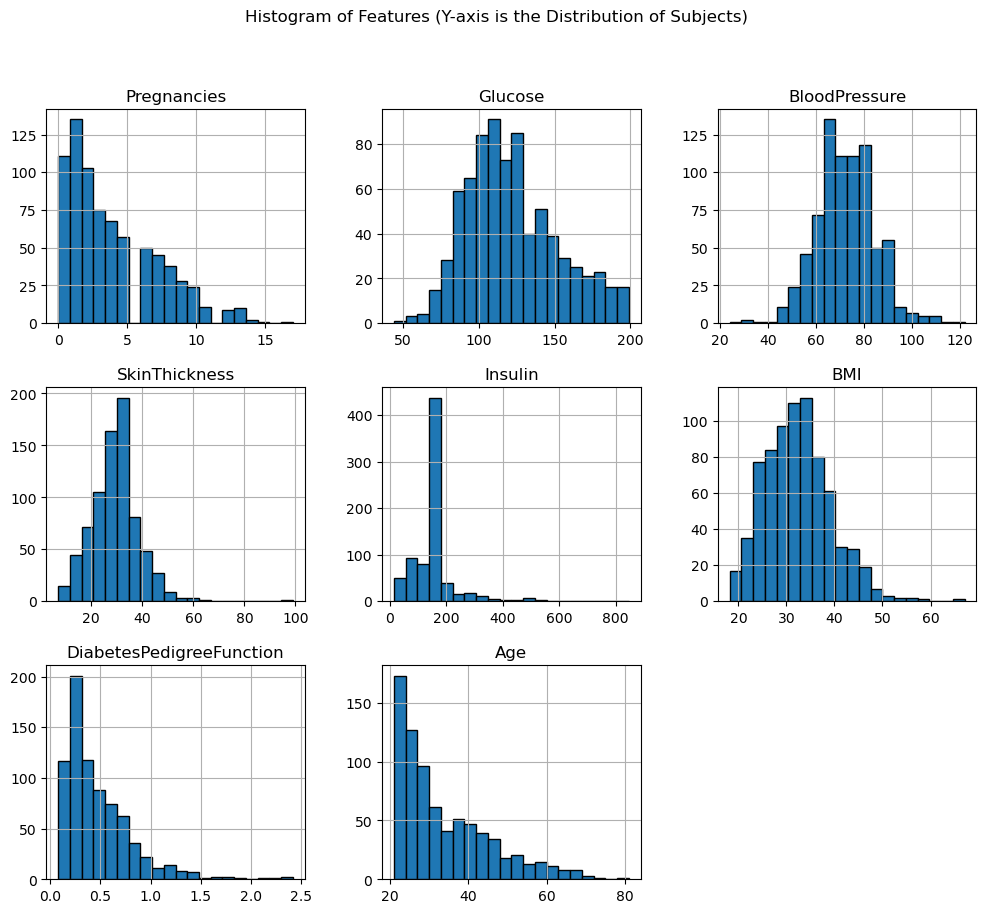

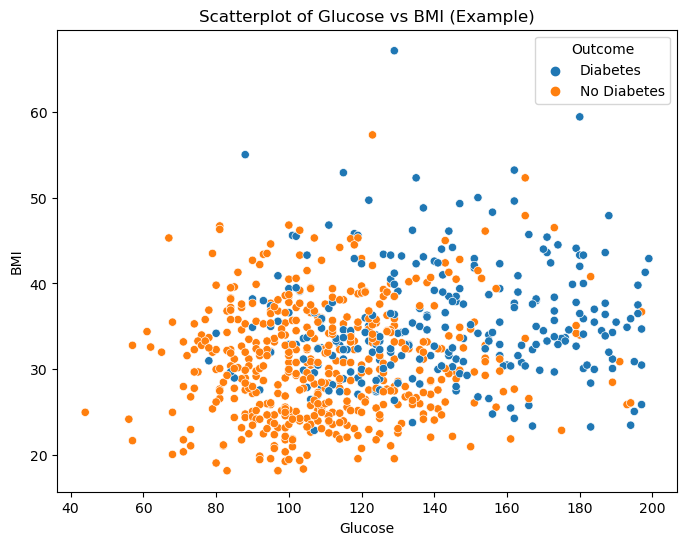

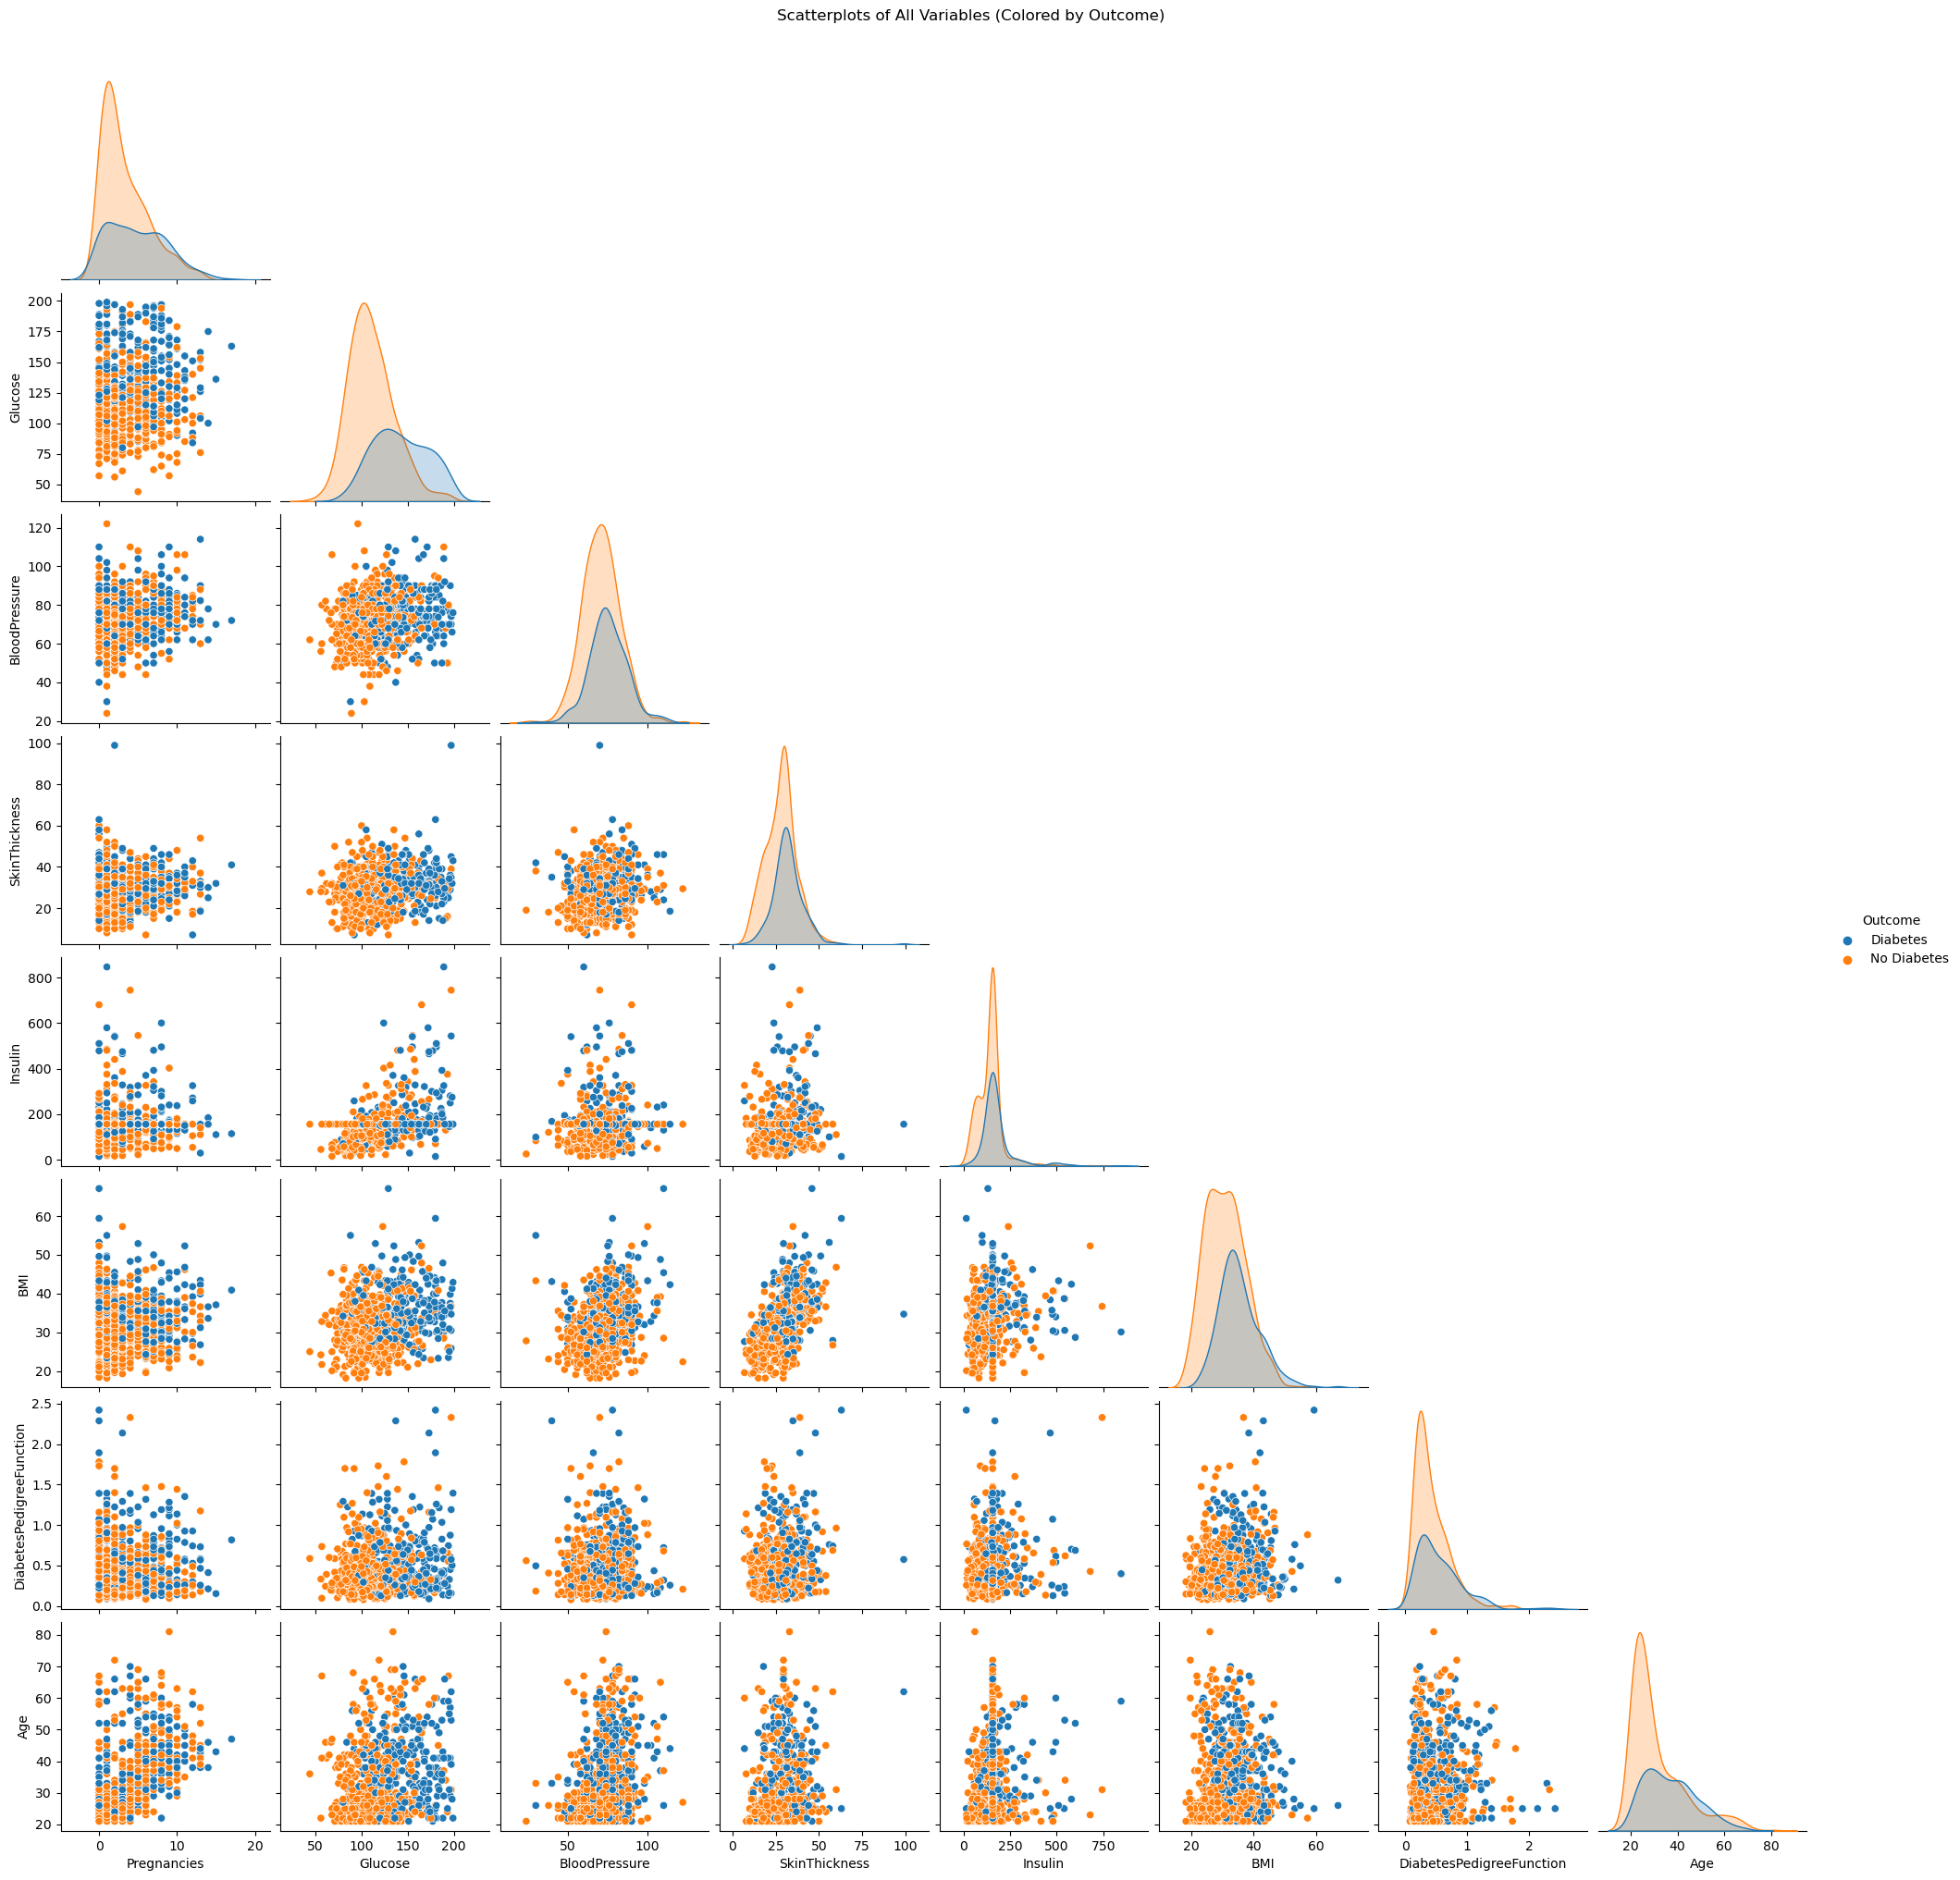

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for all columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_df)
plt.title("Boxplot of Features (Y-axis is the Distribution of Subjects)")
plt.xticks(rotation=45)
plt.show()

# Update the Outcome column labels
diabetes_df['Outcome'] = diabetes_df['Outcome'].replace({0: 'No Diabetes', 1: 'Diabetes'})

# Histograms for each column
diabetes_df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram of Features (Y-axis is the Distribution of Subjects)")
plt.show()

# Sample Scatterplot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diabetes_df, x='Glucose', y='BMI', hue='Outcome')
plt.title("Scatterplot of Glucose vs BMI (Example)")
plt.show()

# Ensure only numeric columns and include 'Outcome' as categorical for hue
numeric_columns = diabetes_df.select_dtypes(include=['number']).columns
scatter_data = diabetes_df[numeric_columns].copy()
scatter_data['Outcome'] = diabetes_df['Outcome'].astype('category')

# Generate pairplot with the cleaned data
sns.pairplot(scatter_data, hue='Outcome', diag_kind='kde', corner=True)
plt.suptitle("Scatterplots of All Variables (Colored by Outcome)", y=1.02)
plt.show()

### 4. Group Comparisons
* Compare groups based on the Outcome column (diabetes-positive vs. diabetes-negative).

Summary Statistics for Diabetes-positive and Diabetes-negative Groups:
            Pregnancies                                                 \
                  count      mean       std  min   25%  50%  75%   max   
Outcome                                                                  
Diabetes          268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   
No Diabetes       500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   

            Glucose              ... DiabetesPedigreeFunction           Age  \
              count        mean  ...                      75%    max  count   
Outcome                          ...                                          
Diabetes      268.0  142.319549  ...                  0.72800  2.420  268.0   
No Diabetes   500.0  110.643863  ...                  0.56175  2.329  500.0   

                                                                 
                  mean        std   min   25%   50%   75%   max  
Outcome                       

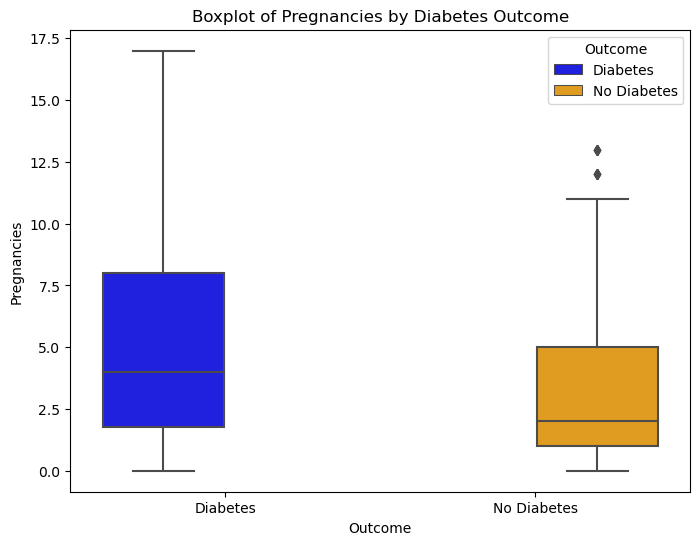

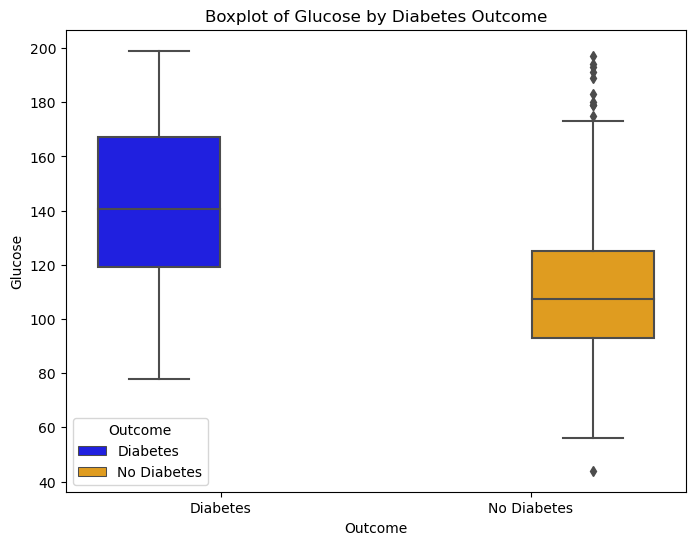

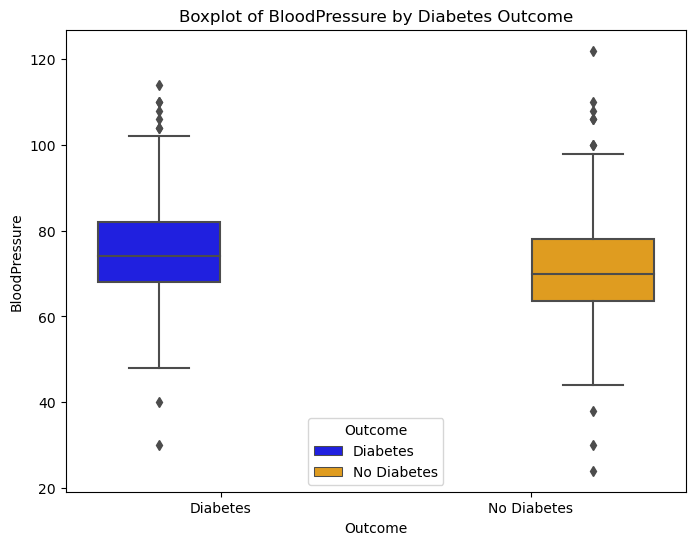

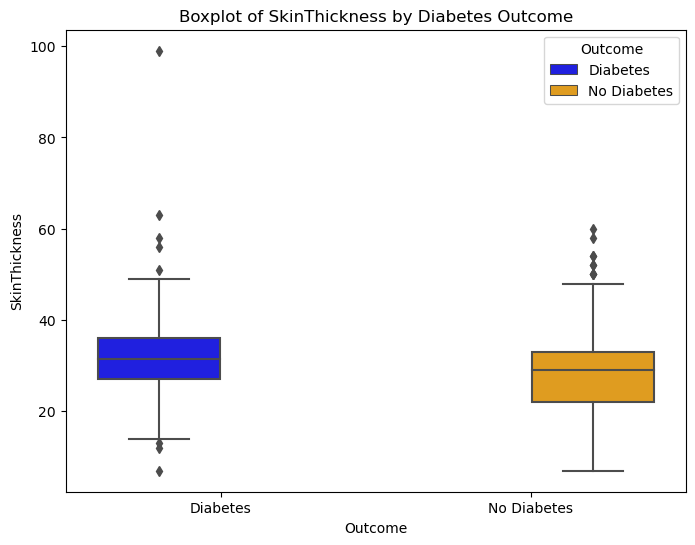

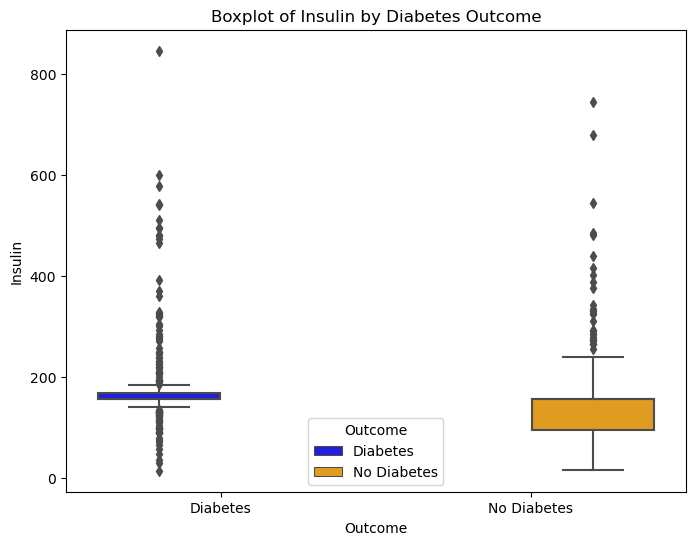

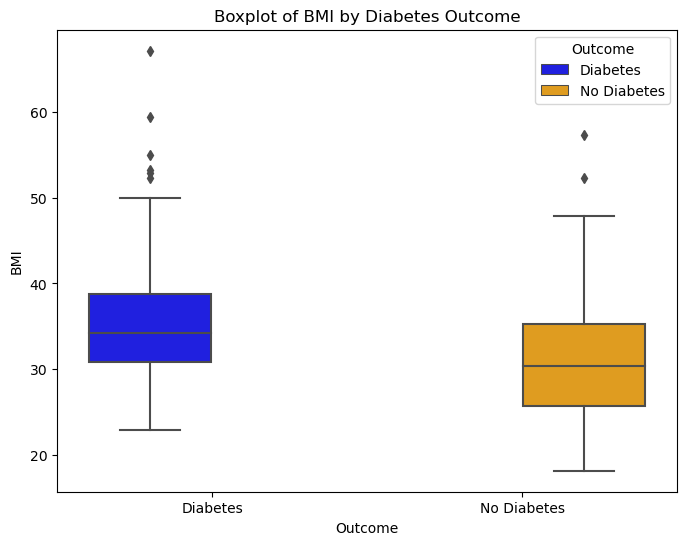

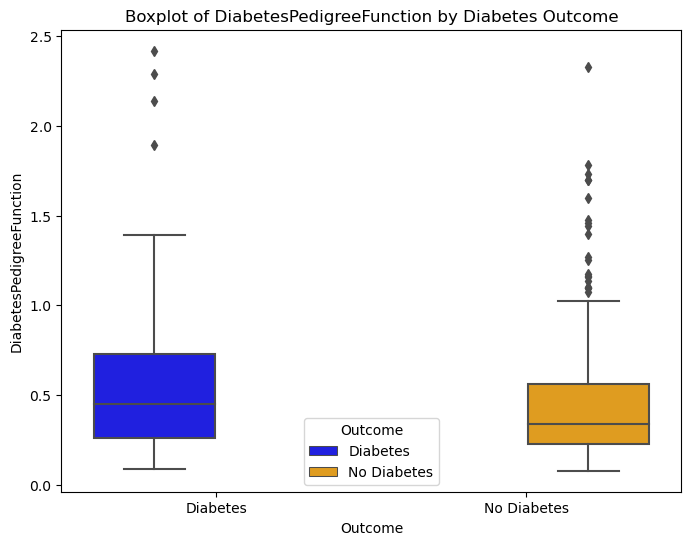

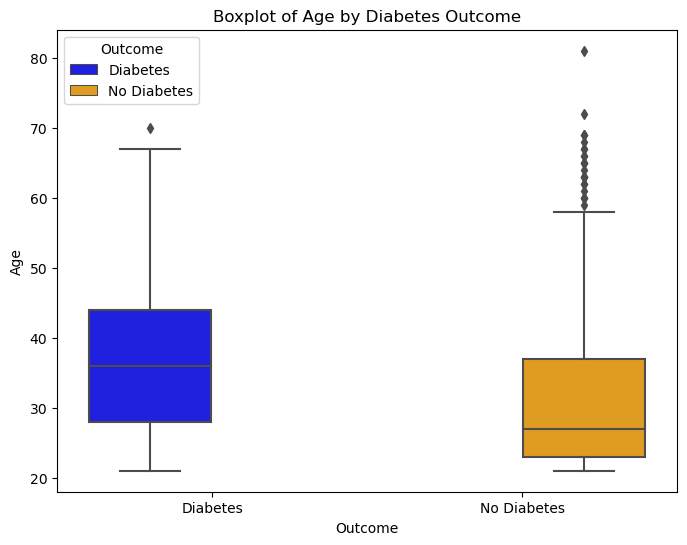

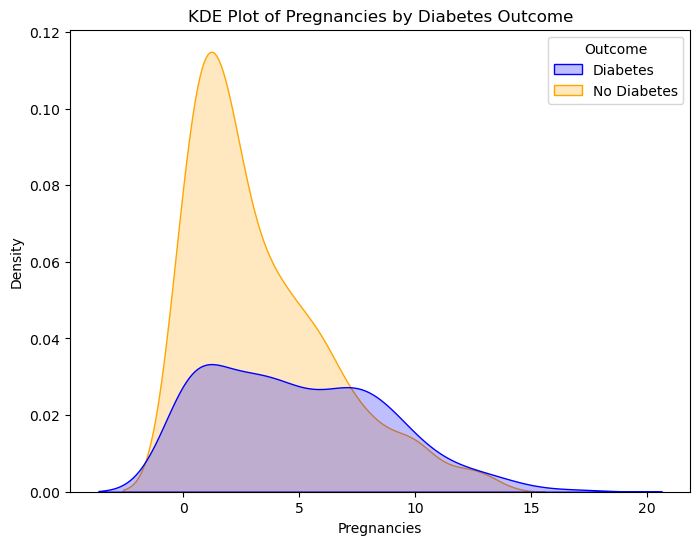

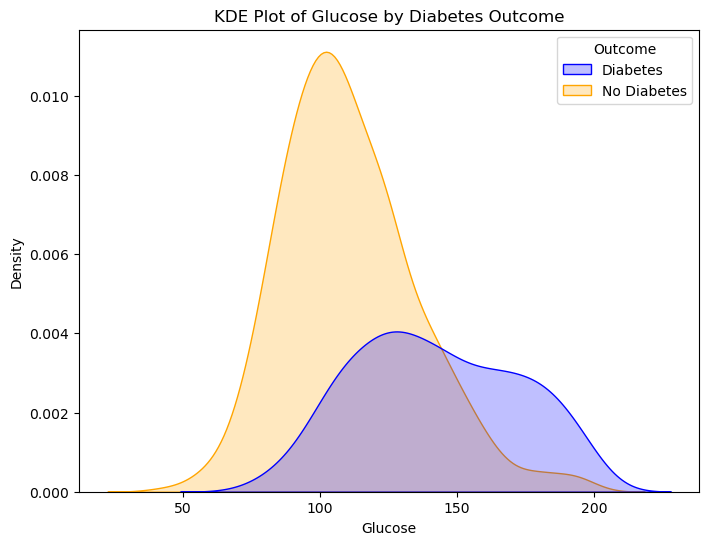

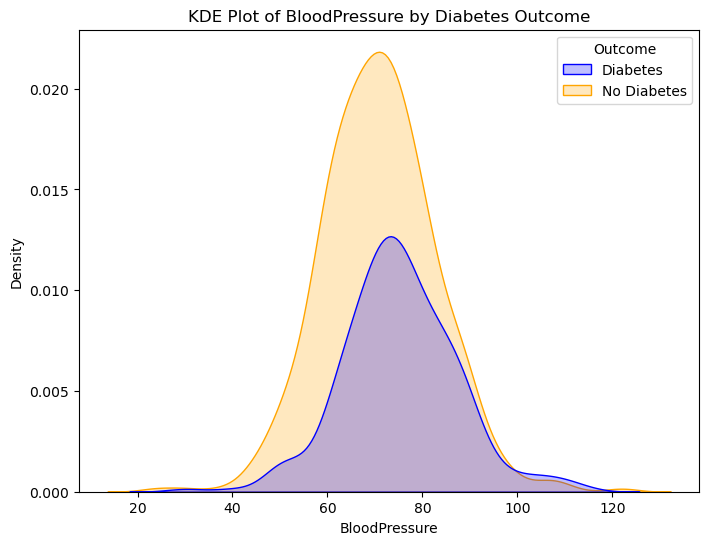

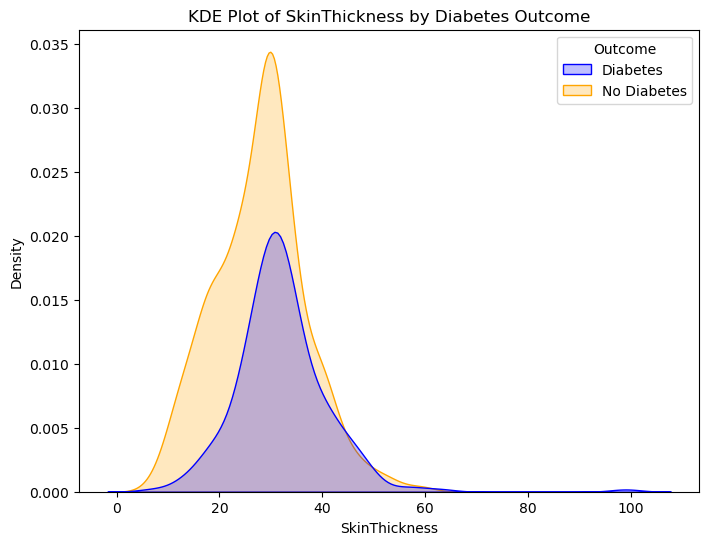

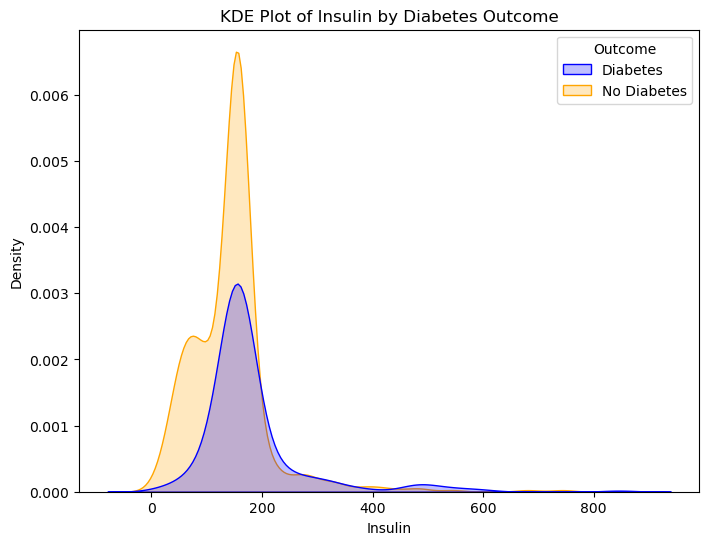

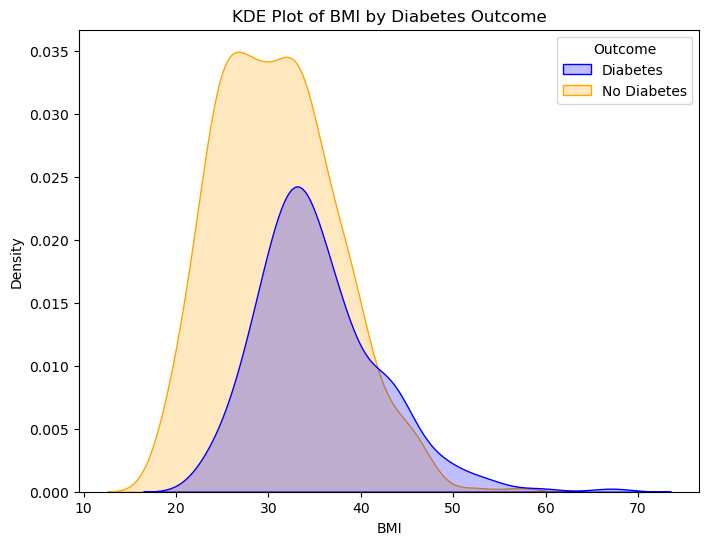

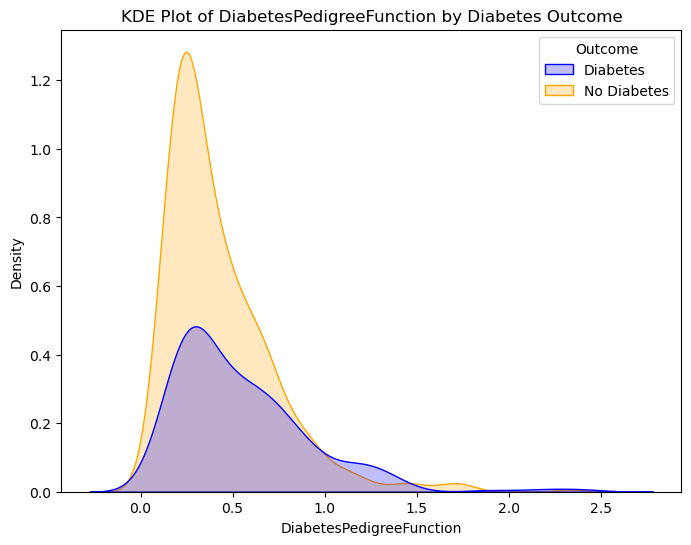

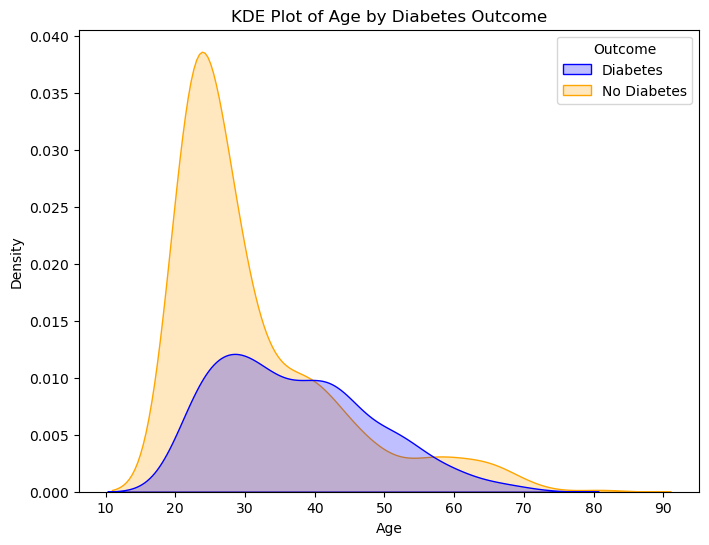

In [16]:
import numpy as np

# Grouped summary statistics
grouped_stats = diabetes_df.groupby('Outcome').describe()

# Display grouped statistics
print("Summary Statistics for Diabetes-positive and Diabetes-negative Groups:")
print(grouped_stats)

custom_palette = {"Diabetes": "blue", "No Diabetes": "orange"}

# Boxplot for all numeric features
numeric_features = diabetes_df.select_dtypes(include=['float', 'int']).columns
for feature in numeric_features:
    if feature != 'Outcome':  # Exclude Outcome from boxplots
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=diabetes_df, x='Outcome', y=feature, hue='Outcome' , palette = custom_palette)
        plt.title(f"Boxplot of {feature} by Diabetes Outcome")
        plt.xlabel("Outcome")
        plt.ylabel(feature)
        plt.show()

# Generate KDE plots for all numeric variables grouped by Outcome
numeric_features = diabetes_df.select_dtypes(include=['float', 'int']).columns

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=diabetes_df, x=feature, hue='Outcome', fill=True, palette={"Diabetes": "blue", "No Diabetes": "orange"})
    plt.title(f"KDE Plot of {feature} by Diabetes Outcome")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()


### 5. Summarry of Analysis
#### Summary statistics for diabetic and non-diabetic groups

In [17]:
# Separate data into diabetes-positive and diabetes-negative groups
diabetes_positive = diabetes_df[diabetes_df['Outcome'] == "Diabetes"]
diabetes_negative = diabetes_df[diabetes_df['Outcome'] == "No Diabetes"]

# Generate summary statistics for each group
positive_stats = diabetes_positive.describe()
negative_stats = diabetes_negative.describe()

# Display summary statistics
print("Diabetes-positive Group Summary:")
print(positive_stats)

print("\nDiabetes-negative Group Summary:")
print(negative_stats)


Diabetes-positive Group Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.319549      75.174364      32.052495  180.431548   
std       3.741239   29.488132      11.977109       8.967543   95.747538   
min       0.000000   78.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      27.000000  155.548223   
50%       4.000000  140.500000      74.000000      31.427273  155.548223   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.383582                  0.550500   37.067164  
std      6.595603                  0.372354   10.968254  
min     22.900000                  0.088000   21.0

### Major Conclusions from Exploratory Data Analysis (EDA)

#### **1. Descriptive Statistics:**
- **Central Tendencies and Variability**:
  - Features like **Glucose**, **BMI**, and **Age** have clear differences between diabetic and non-diabetic groups.
  - For example, diabetics have higher average glucose levels (**142.32** vs. **110.64**) and BMI (**35.38** vs. **30.89**).
- **High Variance**:
  - Features such as **Insulin** and **SkinThickness** show higher variability (e.g., Insulin range: 832, SkinThickness range: 92).

---

#### **2. Boxplot Analysis (Image 1)**:
- **Outliers**:
  - Features like **Insulin**, **Glucose**, and **SkinThickness** exhibit significant outliers, which may influence predictive models.
- **Distribution Differences**:
  - Diabetics show a tendency for higher values in key features like **Glucose**, **BMI**, and **Age**, aligning with their predictive importance.

---

#### **3. Histogram Analysis (Image 2)**:
- **Skewness**:
  - Several features, such as **Pregnancies**, **Insulin**, and **DiabetesPedigreeFunction**, are right-skewed, suggesting possible transformations (e.g., log transformation) may improve model performance.
- **Bimodal Distributions**:
  - **Glucose** and **BMI** show distinct groupings, particularly separating diabetics and non-diabetics.

---

#### **4. Pairwise Correlation Analysis (Image 3 & 4)**:
- **High Correlation**:
  - Strong correlation between **Glucose & BMI** (0.53) and **Pregnancies & Glucose** (0.51) underscores their joint predictive power.
- **Weak Correlation**:
  - Features like **BloodPressure** and **SkinThickness** have weak relationships with diabetes outcomes individually but contribute in combinations.

---

#### **5. Univariate Logistic Regression AUC (Correlation with Diabetes Outcomes)**:
- **Strong Predictors**:
  - **Glucose** (AUC: 0.794) is the most powerful standalone predictor of diabetes.
  - **BMI** and **Age** show moderate predictive power with AUCs of 0.686 and 0.687, respectively.
- **Weaker Predictors**:
  - Features like **BloodPressure**, **SkinThickness**, and **Insulin** have lower AUC scores (~0.6), suggesting limited standalone predictive power.

---

#### **6. Scatterplots (Images 3 & 4)**:
- **Glucose vs. BMI** (Image 3):
  - Diabetics tend to cluster at higher glucose and BMI values, confirming their importance in diabetes classification.
- **Pairwise Scatter Matrix** (Image 4):
  - The scatter matrix highlights clear separation in features like **Glucose**, **BMI**, and **Age** between diabetic and non-diabetic groups.

---

#### **7. Key Findings from Diabetes-Positive vs. Diabetes-Negative Groups**:
- **Higher Means for Diabetics**:
  - Diabetics show elevated levels in almost all features, especially **Glucose** (+31.67), **BMI** (+4.50), and **Age** (+5.88).
- **Variance**:
  - Non-diabetics show lower variability in features like **Glucose** and **Insulin**, indicating more consistent distributions.

---

### Recommendations:
1. **Focus on High-Priority Features**:
   - Leverage **Glucose**, **BMI**, and **Age** as primary features for predictive modeling.
2. **Address Skewness and Outliers**:
   - Apply transformations (e.g., log or square root) to reduce skewness in **Pregnancies**, **Insulin**, and **SkinThickness**.
   - Remove or cap extreme outliers in **Insulin** and **SkinThickness** to stabilize models.
3. **Combine Features**:
   - Explore interactions like **Glucose & BMI** or **Pregnancies & Glucose** for enhanced predictions.
4. **Use Visualization Insights**:
   - Highlight differences in scatterplots and histograms to inform feature engineering and model development.



# Analysis Part 2 - Correlation Analysis

#### Correlation Coefficients
* Measure the strength and direction of relationships between continuous variables
* Visualize correlations among all features to identify strongly related variables using heatmaps.
* Conduct univariate logistic regression to quantify each feature's predictive power for diabetes risk.

#### 1. Correlation Coefficients

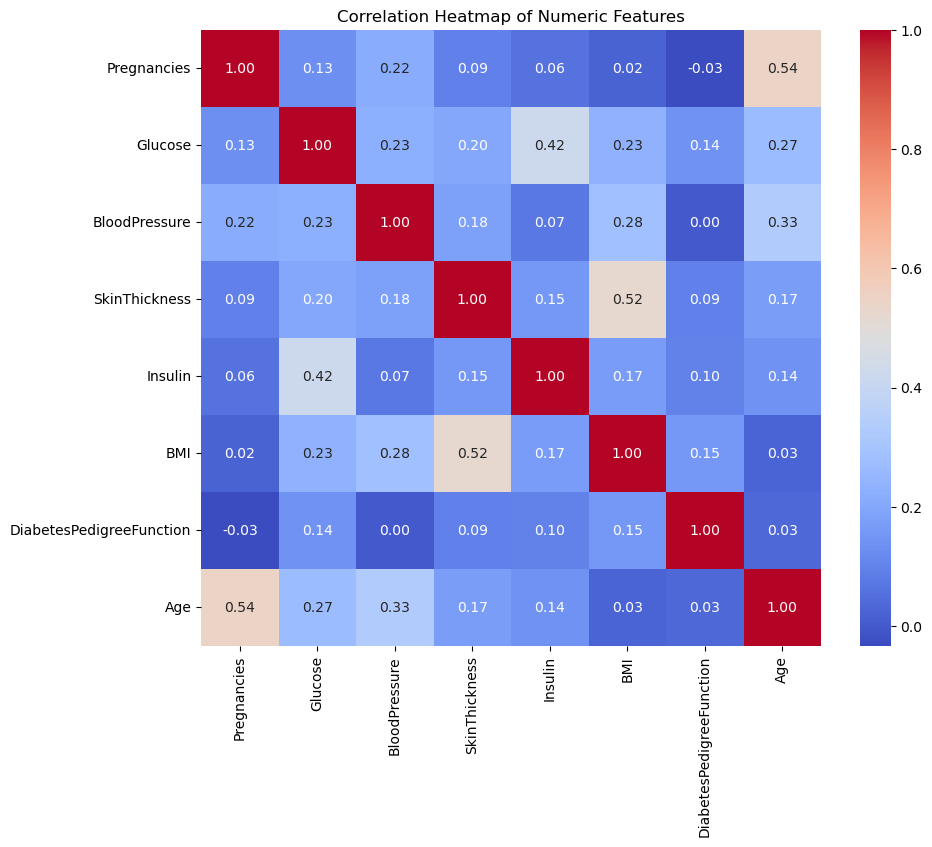

In [18]:
# Correlation Coefficients and Heatmap
import numpy as np

# Calculate correlation coefficients for numeric features
correlation_matrix = diabetes_df.select_dtypes(include=['float', 'int']).corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [19]:
# Calculate correlation coefficients of all numeric features with respect to the binary Outcome
correlation_with_outcome = diabetes_df.select_dtypes(include=['float', 'int']).corrwith(
    (diabetes_df['Outcome'] == "Diabetes").astype(int)
)

# Convert the result to a DataFrame for better presentation
correlation_df = correlation_with_outcome.reset_index()
correlation_df.columns = ['Feature', 'Diabetes Positive']
correlation_df = correlation_df.sort_values(by='Diabetes Positive', ascending=False)

# Print the correlations
print("Correlation Coefficients with Positive Diabetes Outcomes:")
print(correlation_df)


Correlation Coefficients with Positive Diabetes Outcomes:
                    Feature  Diabetes Positive
1                   Glucose           0.495954
5                       BMI           0.312038
7                       Age           0.238356
0               Pregnancies           0.221898
3             SkinThickness           0.215902
4                   Insulin           0.214411
6  DiabetesPedigreeFunction           0.173844
2             BloodPressure           0.169438


In [20]:
from itertools import combinations

# Generate all combinations of two features
feature_pairs = list(combinations(diabetes_df.select_dtypes(include=['float', 'int']).columns, 2))

# Calculate correlation of pairs with the diabetes outcome
pairwise_results = []

for feature1, feature2 in feature_pairs:
    # Combine the two features into a single array
    combined_features = diabetes_df[[feature1, feature2]].sum(axis=1)

    # Calculate correlation with the diabetes outcome
    correlation = combined_features.corr((diabetes_df['Outcome'] == "Diabetes").astype(int))

    # Store the results
    pairwise_results.append({'Feature Pair': f"{feature1} & {feature2}", 'Diabetes Positive': correlation})

# Convert results to DataFrame and sort by correlation
pairwise_correlation_df = pd.DataFrame(pairwise_results).sort_values(by='Diabetes Positive', ascending=False)

# Print the results
print("Pairwise Correlation Coefficients with Diabetes Outcome:")
print(pairwise_correlation_df)


Pairwise Correlation Coefficients with Diabetes Outcome:
                                Feature Pair  Diabetes Positive
10                             Glucose & BMI           0.526676
0                      Pregnancies & Glucose           0.510155
8                    Glucose & SkinThickness           0.510081
12                             Glucose & Age           0.504851
11        Glucose & DiabetesPedigreeFunction           0.497070
7                    Glucose & BloodPressure           0.487058
4                          Pregnancies & BMI           0.374673
26                                 BMI & Age           0.359272
9                          Glucose & Insulin           0.327928
25            BMI & DiabetesPedigreeFunction           0.317710
21                       SkinThickness & Age           0.297047
19                       SkinThickness & BMI           0.293783
2                Pregnancies & SkinThickness           0.271239
15                       BloodPressure & BMI   

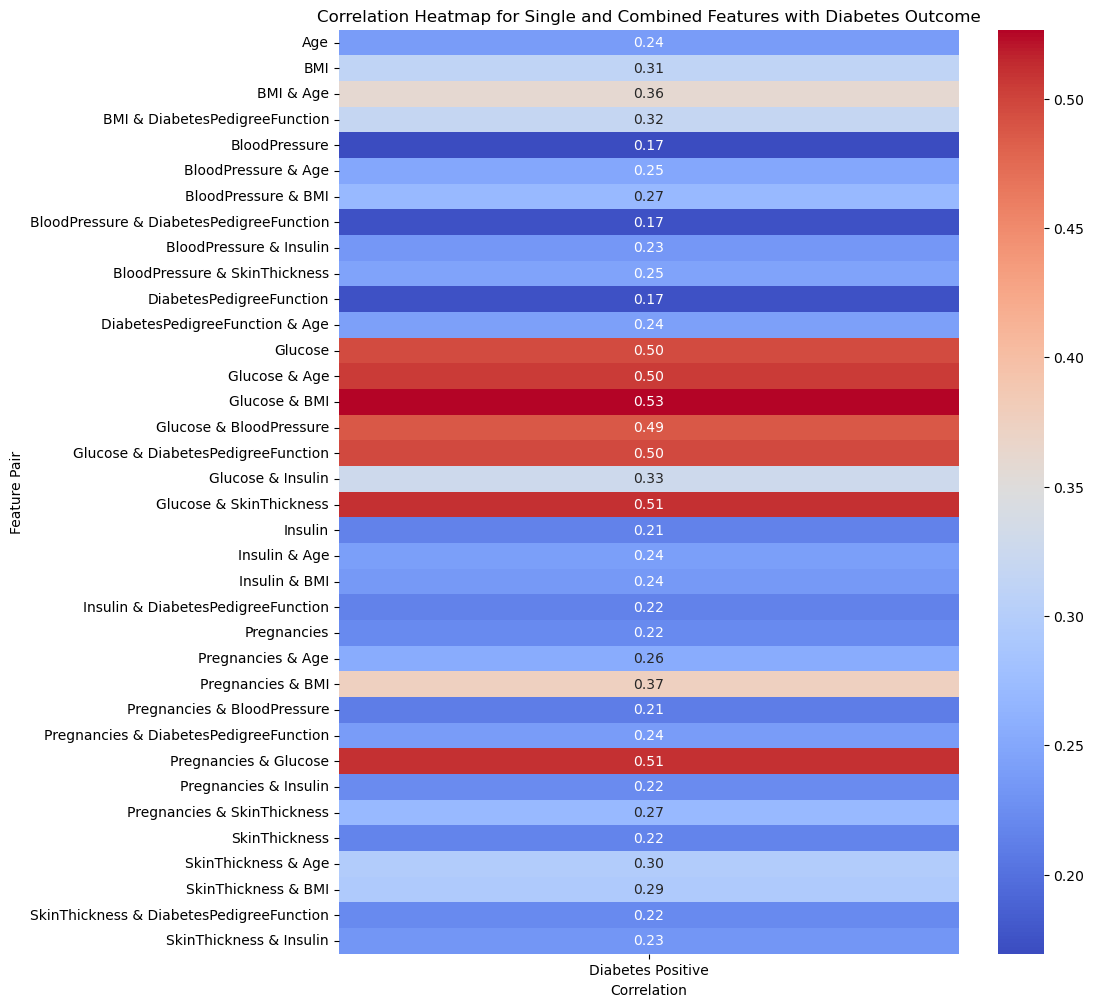

In [21]:
# Combine single feature correlations and pairwise correlations into one DataFrame
single_feature_correlation = correlation_with_outcome.reset_index()
single_feature_correlation.columns = ['Feature Pair', 'Diabetes Positive']

# Combine single feature and pairwise correlations
combined_correlation_df = pd.concat([single_feature_correlation, pairwise_correlation_df])

# Sort by correlation
combined_correlation_df = combined_correlation_df.sort_values(by='Diabetes Positive', ascending=False)


# Pivot for heatmap visualization
heatmap_data = combined_correlation_df.pivot_table(
    values='Diabetes Positive',
    index='Feature Pair',
    aggfunc="sum"
)

# Visualize as a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Single and Combined Features with Diabetes Outcome")
plt.xlabel("Correlation")
plt.show()


#### 2. Univariate logistic regression
* Quantify each feature's predictive power for diabetes risk.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd

# Prepare the target and features
X = diabetes_df.select_dtypes(include=['float', 'int'])  # All numeric features
y = (diabetes_df['Outcome'] == "Diabetes").astype(int)  # Convert Outcome to binary (1 = Diabetes, 0 = No Diabetes)

# Univariate logistic regression
univariate_results = []

for feature in X.columns:
    # Prepare feature for logistic regression
    X_feature = X[[feature]]

    # Fit logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_feature, y)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict_proba(X_feature)[:, 1]
    auc_score = roc_auc_score(y, y_pred_prob)

    # Store results
    univariate_results.append({'Feature': feature, 'AUC': auc_score})

# Convert results to DataFrame
univariate_results_df = pd.DataFrame(univariate_results).sort_values(by='AUC', ascending=False)

# Display univariate logistic regression results
print("Univariate Logistic Regression AUC Scores:")
print(univariate_results_df)

Univariate Logistic Regression AUC Scores:
                    Feature       AUC
1                   Glucose  0.793825
7                       Age  0.686940
5                       BMI  0.685951
4                   Insulin  0.644310
3             SkinThickness  0.631496
0               Pregnancies  0.619515
2             BloodPressure  0.606825
6  DiabetesPedigreeFunction  0.606201


#### Definition: The AUC score ranges between 0 and 1:
* 0.5: No predictive power (random guessing).
* < 0.5: Predictive power is worse than random guessing.
* 0.7-0.8: Moderate predictive power.
* '>' 0.8: Strong predictive power.

#### Results:
* Glucose is the most powerful individual predictor of diabetes.
* BMI and Age are moderately strong and should be included in any predictive model.
* Features like SkinThickness and Insulin are less predictive individually but may contribute meaningfully when combined with other features.
* All features show relative importance and are essential to consider.

## Major Conclusions of Correlation Analysis

### Conclusions Based on Correlation Analysis, Pairwise Correlation, and Univariate Logistic Regression:--

#### **1. Glucose as the Strongest Predictor:**
- **Correlation Analysis**: Highest standalone correlation with diabetes outcome (0.495).
- **Pairwise Correlations**: Dominates combined relationships, with the strongest pair being **Glucose & BMI** (0.526).
- **Univariate AUC**: The highest AUC score (0.794), indicating strong individual predictive power.
- **Conclusion**: Glucose is the most critical feature for diabetes prediction across all analyses.

---

#### **2. BMI as a Key Secondary Predictor:**
- **Correlation Analysis**: Second-highest correlation with diabetes outcome (0.312).
- **Pairwise Correlations**: Combines well with Glucose, Age, and SkinThickness for higher correlations.
- **Univariate AUC**: A moderately strong AUC (0.686), confirming its individual importance.
- **Conclusion**: BMI is a consistent and reliable predictor, particularly in combination with Glucose.

---

#### **3. Age as a Moderate Predictor:**
- **Correlation Analysis**: Third-highest standalone correlation (0.238).
- **Pairwise Correlations**: Combines well with BMI, Glucose, and BloodPressure for moderate predictive power.
- **Univariate AUC**: Moderate predictive power (0.687), suggesting relevance in models that consider demographic factors.
- **Conclusion**: Age is moderately predictive but most effective when paired with other features like BMI and Glucose.

---

#### **4. Importance of Pairwise Combinations:**
- **Glucose & BMI** (0.526), **Glucose & Age** (0.505), and **Glucose & SkinThickness** (0.510) are the top pairs.
- **Pregnancies & Glucose** (0.510) also shows a significant combined effect, suggesting gestational diabetes patterns.
- **Conclusion**: Combining features like Glucose, BMI, and demographic data (e.g., Age, Pregnancies) enhances predictive power.

---

#### **5. Weaker Predictors:**
- **SkinThickness and Insulin**:
  - Individually: Weak standalone correlations (0.215 and 0.214) and lower univariate AUCs (0.631 and 0.644).
  - In Pairs: Moderate contribution when combined with strong features like BMI or Glucose.
  - **Conclusion**: Minimal standalone impact but useful as supporting features.
- **BloodPressure and DiabetesPedigreeFunction**:
  - Show the lowest correlations (0.169 and 0.173) and low AUCs (0.606 each), indicating weaker associations.
  - **Conclusion**: Contribute minimally to prediction, though may capture unique demographic or familial trends.

---

#### **Final Ranked Importance (Standalone and Combined):**
1. **Glucose**: Dominates in all analyses.
2. **BMI**: Consistently strong, both individually and in pairs.
3. **Age**: Moderate importance, particularly effective in combination.
4. **Pregnancies**: Moderate predictor, especially relevant for gestational diabetes.
5. **SkinThickness** and **Insulin**: Minimal standalone importance, stronger in combination.
6. **BloodPressure**: Weakest contributor across all analyses.
7. **DiabetesPedigreeFunction**: Limited standalone importance but captures familial trends.

---

### Recommendations:
1. Focus on **Glucose** and **BMI** as primary predictors for model development.
2. Incorporate **Age** and **Pregnancies** as secondary features, especially in demographic-specific analyses.
3. Use **SkinThickness** and **Insulin** as supplementary predictors in complex models.
4. Consider removing **BloodPressure** and **DiabetesPedigreeFunction** for simpler models or when feature reduction is necessary.


# Analysis Part 3 - Feature Importance Analysis

* Use simple techniques like univariate selection, ANOVA, multivariate logistic regression and SVM to rank features by their importance.

### 1. ANOVA (Analysis of Variance)

* Determine which features (e.g., glucose levels, BMI) contribute most to variability in diabetes outcomes.

In [23]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Prepare the features and target
X = diabetes_df.select_dtypes(include=['float', 'int'])  # Numeric features
y = (diabetes_df['Outcome'] == "Diabetes").astype(int)  # Binary target

# Perform ANOVA (f_classif)
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display feature importance
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Display results
print("Feature Importance Analysis (ANOVA):")
print(anova_results)


Feature Importance Analysis (ANOVA):
                    Feature     F-Score       P-Value
1                   Glucose  249.875521  6.342123e-49
5                       BMI   82.629271  8.336903e-19
7                       Age   46.140611  2.209975e-11
0               Pregnancies   39.670227  5.065127e-10
3             SkinThickness   37.452009  1.494530e-09
4                   Insulin   36.911493  1.946718e-09
6  DiabetesPedigreeFunction   23.871300  1.254607e-06
2             BloodPressure   22.641304  2.333747e-06


#### Key Insights:
Glucose:
The feature with the highest F-score and a near-zero p-value. This confirms that glucose levels are the most important factor in determining diabetes outcomes.

BMI and Age:
Both show strong F-scores and highly significant p-values, indicating their critical role in diabetes prediction. These findings align with known risk factors for diabetes.

Pregnancies, SkinThickness, and Insulin:
These features show moderate significance, reflecting their contributions to variability in diabetes outcomes. They likely capture secondary risk factors or metabolic patterns.

DiabetesPedigreeFunction:
Although moderately significant, this feature reflects genetic predisposition and complements other predictors like BMI and glucose.

BloodPressure:
While statistically significant, its F-score is the lowest, suggesting a relatively weak association with diabetes outcomes compared to other features.

#### Conclusion:
Glucose and BMI are the strongest predictors of diabetes outcomes.
Features like Age, Pregnancies, and Insulin provide additional predictive power but are secondary to glucose and BMI.
While all features contribute, BloodPressure has the weakest impact among those analyzed.

### 2. Multivariate Logistic Regression

* Accounts for Feature Interactions: It evaluates how features (e.g., Glucose, BMI) contribute to the outcome while considering their relationships with other features, unlike univariate analysis.
* Handles Redundancy: Identifies the true impact of a feature by controlling for collinearity (e.g., overlapping information between BMI and Glucose).
* Realistic Predictions: Reflects real-world scenarios where multiple factors collectively influence diabetes risk.
* Feature Prioritization: Highlights which features are most impactful overall for predicting diabetes, making it better suited for model building.
* More Robust Insights: Provides coefficients that show the relative importance of each feature in a combined context, offering a clearer picture than individual AUC scores.

#### Key Differences Between Multivariate and Univariate Logistic Regression:
* Interaction and Context: Multivariate considers all features simultaneously, showing each feature's impact while accounting for the influence of other features. Univariate isolates each feature, ignoring interactions.
* Redundancy and Collinearity: Multivariate identifies the true contribution of a feature by controlling for redundancy (e.g., Glucose and BMI). Univariate may overestimate importance due to shared effects.

In [24]:
# Prepare features and target
X = diabetes_df.select_dtypes(include=['float', 'int'])  # Numeric features
y = (diabetes_df['Outcome'] == "Diabetes").astype(int)  # Binary target

# Multivariate Logistic Regression model with L1 regularization
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1')  # L1 for sparse solutions
log_reg.fit(X, y)

# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=np.abs, ascending=False)  # Sort by absolute value of coefficients

# Display the most important features
feature_importance


Feature  Coefficient
6  DiabetesPedigreeFunction     0.736970
0               Pregnancies     0.122140
5                       BMI     0.086989
1                   Glucose     0.036265
7                       Age     0.011936
2             BloodPressure    -0.011674
3             SkinThickness     0.002811
4                   Insulin    -0.000760

#### Results and Discussion

1. DiabetesPedigreeFunction (0.737):
The strongest predictor in the model, indicating a significant relationship between genetic predisposition and diabetes risk.
A unit increase in this feature greatly increases the likelihood of diabetes when other factors are constant.

2. Pregnancies (0.122):
Moderately important; reflects the role of pregnancy-related risks like gestational diabetes in influencing diabetes outcomes.

3. BMI (0.087):
A moderate positive predictor, aligning with its role in obesity-related diabetes risk, but less impactful than DiabetesPedigreeFunction and Pregnancies in this model.

4. Glucose (0.036):
Surprisingly weak in this multivariate context, likely due to collinearity with other features (e.g., BMI or Insulin), which dilute its standalone importance.

5. BloodPressure (-0.012) and Insulin (-0.001):
Minimal or negative coefficients suggest these features have little or no independent impact on diabetes prediction after accounting for other variables.

### 3. SVM (Support Vector Machine)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and target
X = diabetes_df.select_dtypes(include=['float', 'int'])  # Numeric features
y = (diabetes_df['Outcome'] == "Diabetes").astype(int)  # Binary target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Support Vector Machine (SVM) Results:
Accuracy: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



#### Results and Discussion:

1. Higher Precision for Class 0 (No Diabetes):
* The precision (81%) for predicting "No Diabetes" suggests that the features collectively provide better separation for non-diabetic cases.
* Features like Glucose and BMI likely play a dominant role here, as these are strong indicators of diabetes status.

2. Lower Recall for Class 1 (Diabetes):
* The recall (64%) for predicting "Diabetes" indicates the model misses a significant number of true diabetes cases.
* This might be due to:
a. Overlap in feature distributions between diabetic and non-diabetic groups.
b. Features with less predictive power in separating diabetic cases, such as BloodPressure or SkinThickness.

3. Macro Average:
* The macro average recall (74%) indicates overall effectiveness across classes but reflects room for improvement in capturing diabetes-positive cases.

4. Weighted Importance of Features:
* SVM models implicitly give more importance to features that help maximize the margin of separation between classes:
* Glucose and BMI are likely high-weight features due to their strong association with diabetes risk.
* Features like Age and DiabetesPedigreeFunction may also contribute moderately to capturing subtle patterns.

5. Challenges with Weak Features:
* Features like SkinThickness and Insulin, with weaker relationships to diabetes in previous analyses, may contribute minimally to the decision boundary, potentially affecting recall for class 1.


#### 3.1 Using Permutation Importance to Assess Feature Importance of SVM

SVM Feature Importance (Permutation Importance):
                    Feature  Importance
1                   Glucose    0.144156
5                       BMI    0.037662
3             SkinThickness    0.015584
6  DiabetesPedigreeFunction    0.011688
0               Pregnancies    0.006494
2             BloodPressure    0.005195
4                   Insulin    0.005195
7                       Age   -0.016883


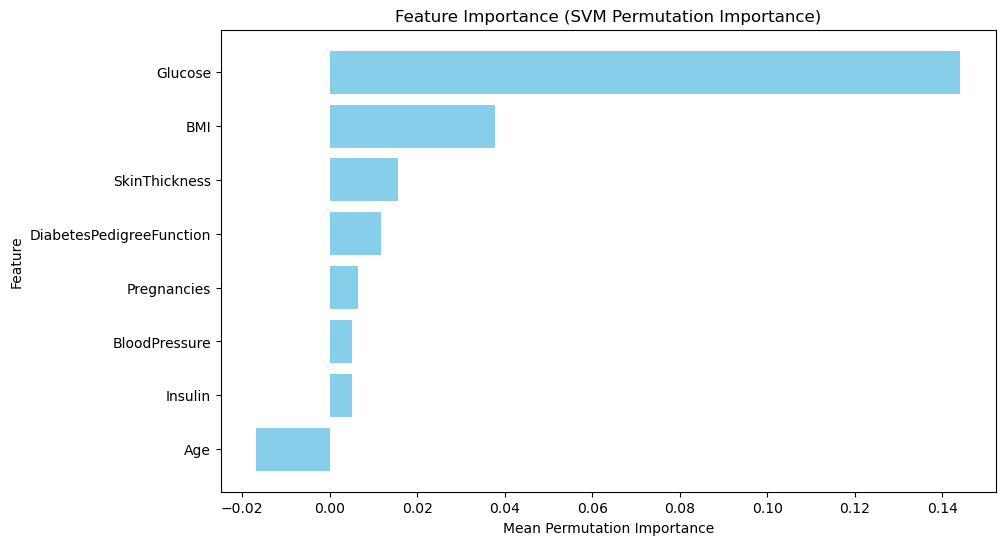

In [26]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Perform permutation importance analysis
perm_importance = permutation_importance(svm_model, X_test, y_test, scoring='accuracy', random_state=42)

# Create a DataFrame for feature importance
svm_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("SVM Feature Importance (Permutation Importance):")
print(svm_feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importance['Feature'], svm_feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title("Feature Importance (SVM Permutation Importance)")
plt.xlabel("Mean Permutation Importance")
plt.ylabel("Feature")
plt.show()

#### Feature Importance Results using Permutation Importance

1. Glucose Dominance:
* Glucose is by far the most important feature, confirming its critical role in distinguishing diabetes outcomes.

2. Moderate Contribution:
* Features like BMI and DiabetesPedigreeFunction contribute meaningfully but are secondary to Glucose.

3. Minimal or Negative Impact:
* Features like SkinThickness, Insulin, and Age have little to no predictive power in this SVM model.

4. Permutation Importance:
* Reflects the change in model accuracy when a feature is randomly permuted, highlighting its true contribution to predictions.

## Major Conclusions on Feature Importance

#### Takeaways and Feature Ranking from ANOVA, Logistic Regression, and SVM:

### 1. **Glucose**:
- **ANOVA**: The most significant feature with the highest F-Score (249.88, \(p < 10^{-49}\)), indicating it explains the most variability in diabetes outcomes.
- **Logistic Regression**: Surprisingly low coefficient (0.036), possibly due to collinearity with other features.
- **SVM Permutation Importance**: The highest importance (0.1351), reinforcing its critical role in distinguishing diabetes outcomes.
- **Takeaway**: **Glucose** is consistently the top predictor across methods, essential for diabetes prediction.

---

### 2. **BMI (Body Mass Index)**:
- **ANOVA**: Second highest F-Score (82.63, \(p < 10^{-19}\)), showing strong correlation with diabetes outcomes.
- **Logistic Regression**: Moderate coefficient (0.087), indicating a consistent positive effect in multivariate context.
- **SVM Permutation Importance**: Moderate importance (0.0143), confirming its contribution to classification.
- **Takeaway**: **BMI** is a strong and consistent predictor of diabetes risk, though less impactful than Glucose.

---

### 3. **DiabetesPedigreeFunction**:
- **ANOVA**: Relatively low F-Score (23.87, \(p < 10^{-6}\)), but still statistically significant.
- **Logistic Regression**: The highest coefficient (0.737), indicating a strong genetic influence in multivariate context.
- **SVM Permutation Importance**: Moderate importance (0.0091), aligning with its genetic relevance.
- **Takeaway**: **DiabetesPedigreeFunction** is a critical genetic marker, particularly in models accounting for feature interactions.

---

### 4. **Pregnancies**:
- **ANOVA**: Moderate F-Score (39.67, \(p < 10^{-10}\)), reflecting a significant standalone effect.
- **Logistic Regression**: Moderate coefficient (0.122), suggesting a direct impact in multivariate settings.
- **SVM Permutation Importance**: Negligible importance (-0.0039), indicating minimal contribution to SVM performance.
- **Takeaway**: **Pregnancies** has a notable standalone effect, especially in simpler models, but contributes less in more complex scenarios like SVM.

---

### 5. **Age**:
- **ANOVA**: Moderate F-Score (46.14, \(p < 10^{-11}\)), showing its standalone influence on diabetes outcomes.
- **Logistic Regression**: Very low coefficient (0.012), suggesting a minimal impact when other features are included.
- **SVM Permutation Importance**: Negative importance (-0.0247), possibly adding noise in the SVM model.
- **Takeaway**: **Age** is important in simpler analyses (e.g., ANOVA) but contributes less when combined with other features.

---

### 6. **BloodPressure**:
- **ANOVA**: The lowest F-Score (22.64, \(p < 10^{-6}\)) among significant features, indicating weak standalone association.
- **Logistic Regression**: Negative coefficient (-0.011), implying no meaningful contribution in multivariate settings.
- **SVM Permutation Importance**: Low importance (0.0078), aligning with its weak influence overall.
- **Takeaway**: **BloodPressure** is a weak predictor of diabetes outcomes across all methods.

---

### 7. **SkinThickness and Insulin**:
- **ANOVA**: Low F-Scores (37.45 and 36.91), significant but weak standalone association.
- **Logistic Regression**: Near-zero coefficients (0.003 and -0.001), reflecting minimal impact in multivariate settings.
- **SVM Permutation Importance**: Minimal or negative importance (0.0026 and -0.0013), indicating little to no predictive power.
- **Takeaway**: **SkinThickness** and **Insulin** provide little value in predicting diabetes outcomes.

---

### Final Feature Ranking by Importance:
1. **Glucose**: Universally top-ranked across all methods.
2. **BMI**: Strong predictor in ANOVA, moderate in Logistic Regression and SVM.
3. **DiabetesPedigreeFunction**: High importance in multivariate contexts, moderate in SVM.
4. **Pregnancies**: Moderate standalone impact, weak in SVM.
5. **Age**: Significant in ANOVA, minimal elsewhere.
6. **BloodPressure**: Weak across all methods.
7. **SkinThickness** and **Insulin**: Negligible contributions overall.

# Analysis Part 4: Clustering and Visulization of Risk Profiles

Identify subgroups of patients with similar risk patterns and highlight unique trends that can lead to targeted interventions

### 1.1 Normalizing Data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import silhouette_score

import seaborn as sns


# Select numeric columns
numeric_data = diabetes_df.select_dtypes(include=['float', 'int'])

# Normalize data (Min-Max scaling)
normalized_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())

# standardized data
# standardized_data = (numeric_data - numeric_data.mean()) / (numeric_data.std())

normalized_data
# standardized_data

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2       0.470588  0.896774       0.408163       0.240217  0.170130  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.170130  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.239130  0.170130  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.170130  0.249489   

     DiabetesPedigreeFunction       Age  
0                    0.234415  0.483333  
1                    0.116567  0.166667  
2                    0.253629  0.183333  
3                    0.038002  0.000000  
4                    0.943638  0.200000  
..                        ...       ...  
763                  0.039710  0.700000  
764                  0.111870  0.100000  
765                  0.071307  0.150000  
766                  0.115713  0.433333  
767                  0.101196  0.033333  

[768 rows x 8 columns]

### 1.2 Elbow Method

c:\Users\adria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


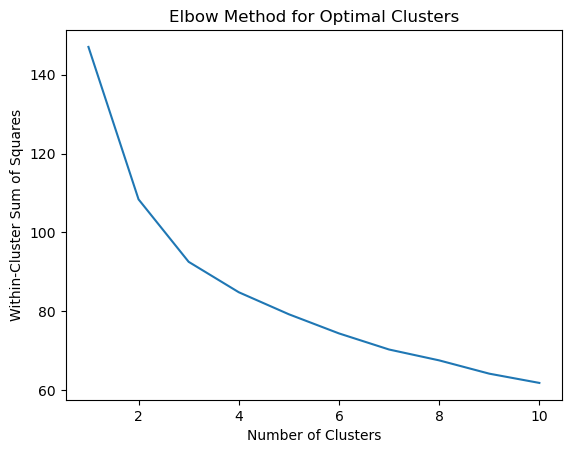

In [28]:
# Using the Elbow method to find the optimal number of clusters
# Calculating the WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


### 1.3 KMeans Clustering

In [29]:
# Using Elbow method to find the optimal number of clusters, k =3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(normalized_data)

# Associating data in dataframe with Cluster
normalized_data['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Data with Clusters:\n", normalized_data)

Data with Clusters:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2       0.470588  0.896774       0.408163       0.240217  0.170130  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.170130  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.239130  0.170130  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.170130  0.249489   

     DiabetesPedig

### 1.4 Silhouette Score

Calculate how well the Kmeans clustering grouped the data points

In [30]:
# Calculate the silhouette score
sil_score = silhouette_score(normalized_data, normalized_data['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6202383204227047


#### Insight
The silhouette score is a metric used to evaluate the quality of clustering by measuring both the cohesion within clusters and the separation between them. The score ranges from -1 to 1, where a higher score indicates better-defined clusters. A score of 0.62 suggests that while the clustering results are not perfect, they demonstrate reasonable cohesion, with data points within each cluster being relatively close to one another, and moderate separation between clusters. This indicates that the features used in the clustering process exhibit a degree of uniqueness, which can facilitate the identification of key variables that differentiate the clusters from one another.

### 1.5 Cluster Summary and Statistics

In [31]:
# Cluster summary and statistics
cluster_summary = normalized_data.groupby('Cluster').describe()
print(cluster_summary)

        Pregnancies                                                         \
              count      mean       std  min       25%       50%       75%   
Cluster                                                                      
0             386.0  0.122524  0.101901  0.0  0.058824  0.117647  0.176471   
1             226.0  0.454971  0.169857  0.0  0.352941  0.470588  0.588235   
2             156.0  0.151207  0.134157  0.0  0.058824  0.117647  0.235294   

                  Glucose            ... DiabetesPedigreeFunction            \
              max   count      mean  ...                      75%       max   
Cluster                              ...                                      
0        0.470588   386.0  0.388032  ...                 0.201964  0.705807   
1        1.000000   226.0  0.530669  ...                 0.242208  0.596926   
2        0.470588   156.0  0.738888  ...                 0.294406  1.000000   

           Age                                          

In [32]:
# Cluster statistics
centroids_df = pd.DataFrame(centroids, columns=normalized_data.columns[:-1])
print("Cluster Centroids:\n", centroids_df)

Cluster Centroids:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.122524  0.388032       0.447005       0.212926  0.137297  0.249144   
1     0.454971  0.530669       0.542400       0.259883  0.179643  0.291809   
2     0.151207  0.738888       0.537920       0.293331  0.237588  0.395941   

   DiabetesPedigreeFunction       Age  
0                  0.149987  0.083592  
1                  0.162948  0.428540  
2                  0.220773  0.176709  


### 1.6 Visualization

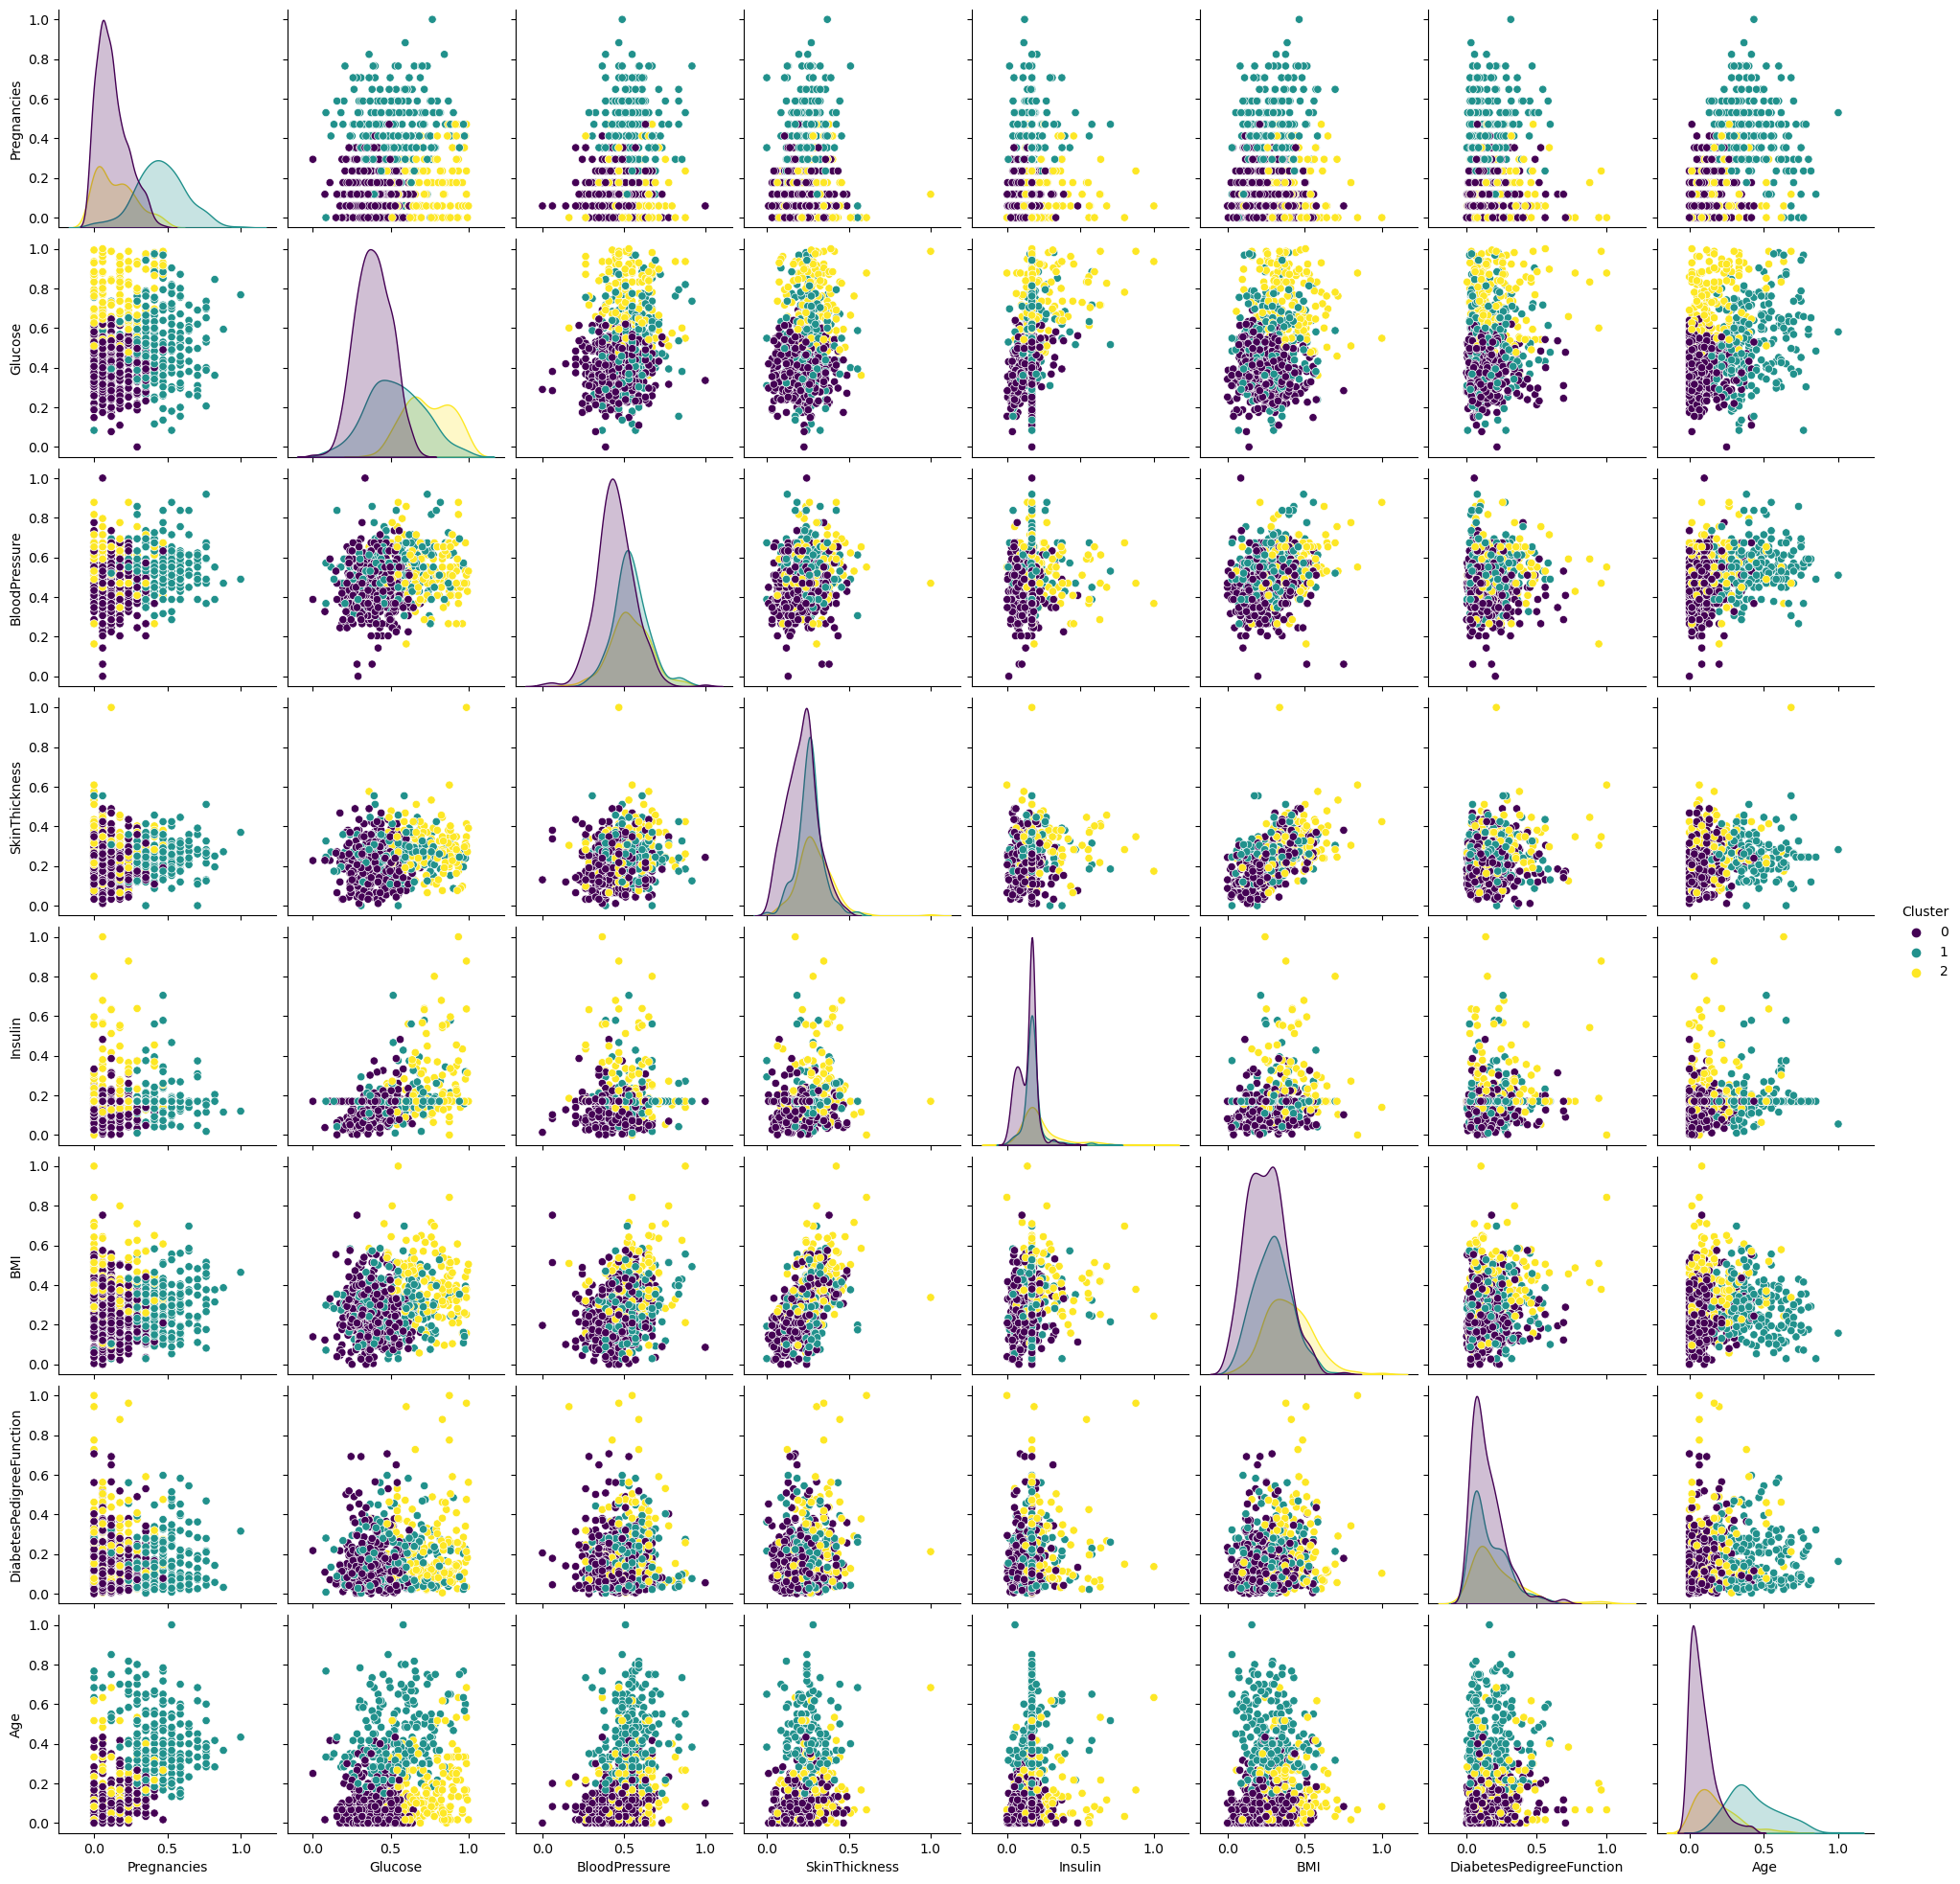

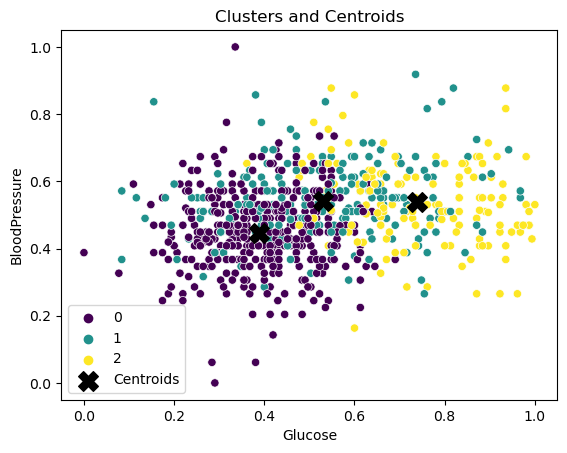

In [33]:
sns.pairplot(normalized_data, hue='Cluster', palette='viridis')
plt.show()

# Visualize cluster centroids
sns.scatterplot(x=normalized_data['Glucose'], y=normalized_data['BloodPressure'], hue=normalized_data['Cluster'], palette='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], color='black', marker='X', s=200, label='Centroids')
plt.title('Clusters and Centroids')
plt.legend()
plt.show()



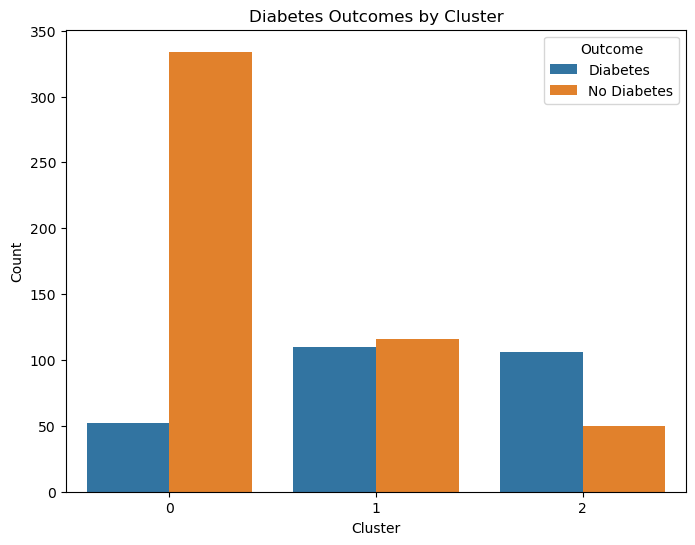

In [34]:
# Merge the two dataframes
df_merged = pd.concat([normalized_data['Cluster'], diabetes_df['Outcome']], axis=1)

# create a frequency table for the two columns
cluster_outcome = pd.crosstab(df_merged['Cluster'], df_merged['Outcome'])

plt.figure(figsize=(8, 6))
sns.countplot(data=df_merged, x='Cluster', hue='Outcome')
plt.title('Diabetes Outcomes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [35]:
cluster_outcome_counts = pd.crosstab(df_merged['Cluster'], df_merged['Outcome'])

# Display the counts
print("Counts for each Cluster and Outcome:\n", cluster_outcome_counts)

Counts for each Cluster and Outcome:
 Outcome  Diabetes  No Diabetes
Cluster                       
0              52          334
1             110          116
2             106           50


## Results & Discussion

### Cluster Analysis Summary:

#### Cluster 0:

* Lowest average glucose (0.39) and BMI (0.25).
* Generally lower Insulin levels (0.14) and Skin Thickness (0.21).
* Age (0.08) and Pregnancies (0.12) are also the lowest.
*
* Likely represents individuals at a lower risk of diabetes.

#### Cluster 1:

* Moderately high glucose (0.53) and slightly higher BMI (0.29).
* Slightly elevated Insulin (0.18) and Skin Thickness (0.26).
* Higher age (0.43) compared to Cluster 0, possibly linked to increased diabetes risk over time.

#### Cluster 2:

* Highest glucose (0.74) and BMI (0.40).
* Elevated Insulin levels (0.24) and Skin Thickness (0.29).
* Highest average DiabetesPedigreeFunction (0.22), indicating stronger family history correlations.
* Slightly higher Pregnancies (0.15) compared to Cluster 0.


#### Observations:
* Glucose and BMI are clear indicators, with higher levels correlating to increased likelihood of being in Cluster 2, potentially representing diabetes diagnosis.
* Family History (DiabetesPedigreeFunction) has a noticeable impact, being highest in Cluster 2.
* Age and Insulin also gradually increase across the clusters, which could reflect their contribution to risk.


### Discussion:
K-Means Clustering is a useful method for finding patterns and similarities in data by grouping individuals with shared characteristics. These clusters represent distinct health profiles, each linked to different levels of diabetes risk. Unlike focusing on a single factor, clustering considers multiple variables, such as glucose levels, BMI, and family history, at the same time. This provides a more complete and accurate assessment of risk. It also helps prioritize screening by identifying which individuals belong to higher-risk clusters, enabling more targeted and efficient interventions.







